In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
df['species'].value_counts()

,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


## QUESTION - 1

Plot a scatter plot of bill_length_mm vs flipper_length_mm.

Color the points by species using different colors for each species.

Use a marker size of 50.

Add legend for species.

Add title 'Bill Length vs Flipper Length by Species'.

Label the axes properly.

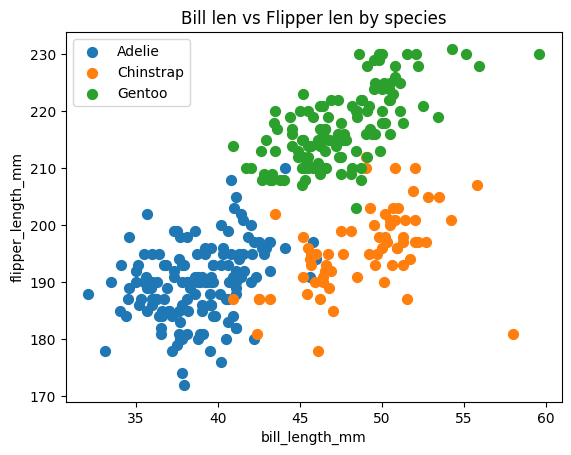

In [ ]:
for i in df['species'].unique():
  plt.scatter(df[df['species']==i]['bill_length_mm'],df[df['species']==i]['flipper_length_mm'],s=50,label=i)
plt.title('Bill len vs Flipper len by species')
plt.xlabel('bill_length_mm')
plt.ylabel('flipper_length_mm')
plt.legend()
plt.show()

## QUESTION - 2

Plot a histogram of body_mass_g for each species on the same figure to compare them.

Use 15 bins.

Each species should have a different color.

Add a legend for species.

Set the histogram to have alpha=0.5 for overlap.

Add a title 'Body Mass Distribution by Species' and label axes appropriately.

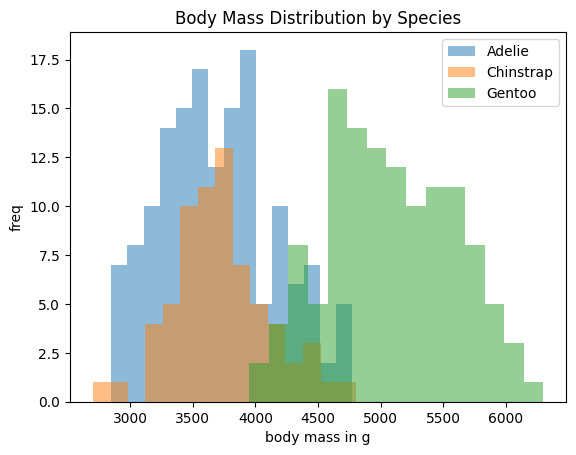

In [ ]:
for i in df['species'].unique():
  plt.hist(df[df['species']==i]['body_mass_g'],bins=15,label=i,alpha=0.5)
plt.xlabel('body mass in g')
plt.ylabel('freq')
plt.title('Body Mass Distribution by Species')
plt.legend()
plt.show()

## QUESTION - 3

Create a bar chart that shows the average flipper length for each island.

Requirements:

The x-axis should be island names.

The y-axis should be average flipper length (flipper_length_mm).

Each bar should have a different color (manually set any colors you like).

Add the exact average value on top of each bar (use plt.text).

Add a title: 'Average Flipper Length by Island'.

Label x-axis and y-axis appropriately.

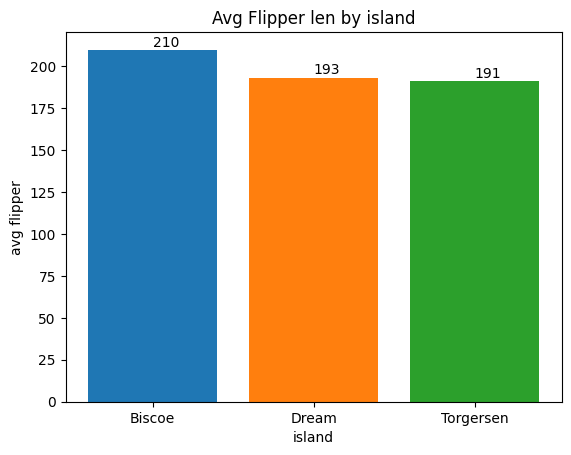

In [ ]:
for i,j in df.groupby('island'):
  m = j['flipper_length_mm'].mean()
  plt.bar(i,m)
  plt.text(i,m+2,round(m))
plt.xlabel('island')
plt.ylabel('avg flipper')
plt.title('Avg Flipper len by island')
plt.show()

## QUESTION - 4

Create a figure with two subplots side by side (1 row, 2 columns):

Left subplot:

A scatter plot of bill_length_mm vs bill_depth_mm.

Color points by sex ('Male' and 'Female').

Use different markers for each sex ('o' and 's').

Add legend for sex.

Right subplot:

A heatmap of the correlation matrix of all numerical columns (bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g).

Show values inside the heatmap squares.

Both subplots:

Have appropriate titles.

Make sure the layout is tight so they don’t overlap.

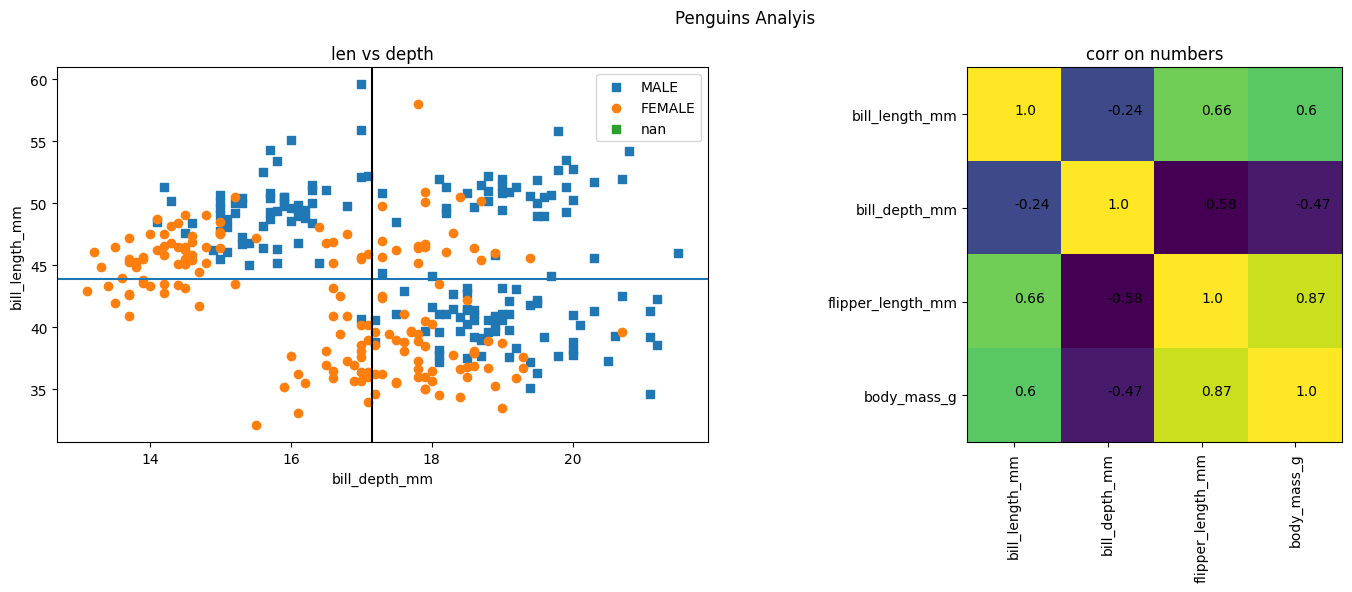

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
marker_ = ['o','s']
for j,i in enumerate(df['sex'].unique()):
  temp = df[df['sex'] == i]
  ax[0].scatter(temp['bill_depth_mm'],temp['bill_length_mm'],label=i,marker=marker_[j-1])
ax[0].set_xlabel('bill_depth_mm')
ax[0].set_ylabel('bill_length_mm')
ax[0].set_title('len vs depth')
ax[0].axhline(df['bill_length_mm'].mean())
ax[0].axvline(df['bill_depth_mm'].mean(),color='black')
ax[0].legend()


ax[1].imshow(df.select_dtypes([int,float]).corr())
for i in range(len(df.select_dtypes([int,float]).columns)):
  for j in range(len(df.select_dtypes([int,float]).columns)):
    ax[1].text(i,j,df.select_dtypes([int,float]).corr().iloc[i,j].round(2))
ax[1].set_title('corr on numbers')
ax[1].set_xticks([0,1,2,3],labels=df.select_dtypes([int,float]).columns,rotation=90)
ax[1].set_yticks([0,1,2,3],labels=df.select_dtypes([int,float]).columns)

fig.suptitle('Penguins Analyis')
fig.tight_layout()
plt.show()

## QUESTION - 5


Create a 3D scatter plot to visualize:

bill_length_mm (x-axis)

bill_depth_mm (y-axis)

flipper_length_mm (z-axis)

Color the points by species (each species should have a different color).
Use a marker size of 40.
Add a legend for species.
Label all 3 axes and add the title: '3D Scatter: Bill & Flipper Dimensions by Species'.


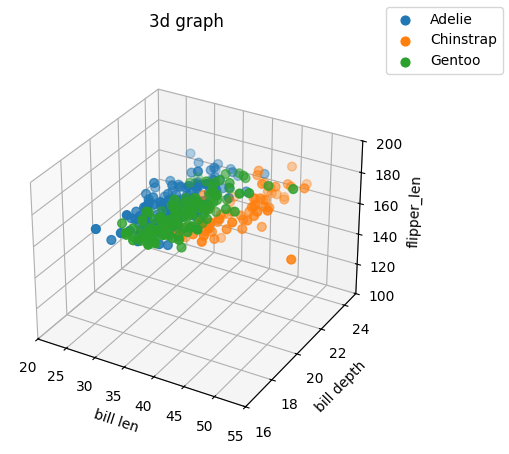

In [ ]:
fig = plt.figure()

ax = plt.subplot(projection='3d')
for i in df['species'].unique():
  temp = df[df['species'] == i]
  ax.scatter3D(temp['bill_length_mm'],temp['bill_depth_mm'],temp['flipper_length_mm'],s=40,label=i)
ax.set_xlim(20,55)
ax.set_ylim(16,25)
ax.set_zlim(100,200)
ax.set_xlabel('bill len')
ax.set_ylabel('bill depth')
ax.set_zlabel('flipper_len')
fig.suptitle('3d graph')
fig.legend()
fig.show()

## QUESTION -6

Bar chart: Show the number of penguins for each species and island combination as grouped bars.

Requirements:

- X-axis: island
- Grouped bars: one bar per species within each island.
- Use different colors for each species.
- Add a legend for species.
- Title: 'Penguin Count by Species and Island'
- Label axes properly.
- Bars should be side by side for each island.


Text(0, 0.5, 'counts')

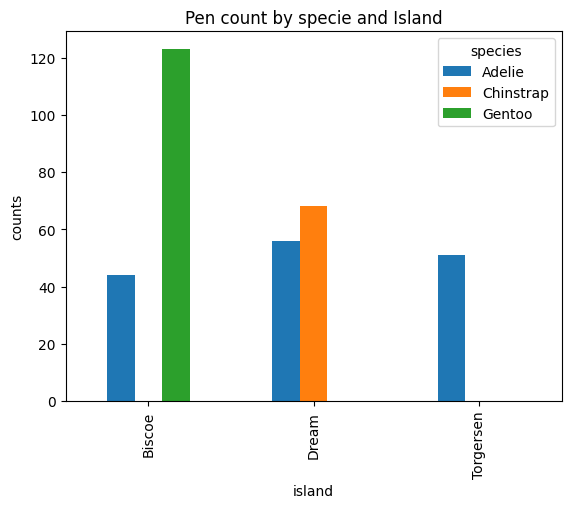

In [ ]:
df.groupby(['island','species'])['bill_length_mm'].count().unstack().plot(kind='bar',title='Pen count by specie and Island')
plt.ylabel('counts')

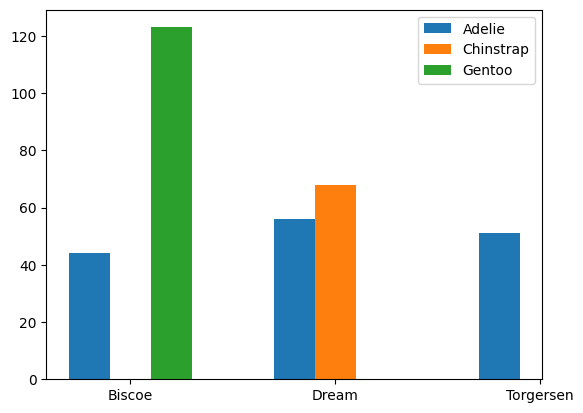

In [ ]:
counts = df.groupby(['island','species'])['bill_length_mm'].count().unstack()

islands = counts.index.to_list()
species = counts.columns.to_list()

x = np.arange(len(islands))
width = 0.2

fig, ax = plt.subplots()

for i,sp in enumerate(species):
  ax.bar(
      x+i*width,
      counts[sp],
      width = width,
      label=sp
  )

ax.set_xticks(x+width)
ax.set_xticklabels(islands)
ax.legend(loc='upper right')

## QUESTION - 7

Create a colored scatter plot of flipper_length_mm vs body_mass_g only for Gentoo penguins.

Requirements:

Color the points by sex using custom colors: 'Male' → 'blue', 'Female' → 'red'.

Use marker style: 'x' for Male, 'o' for Female.

Set figure size to (10, 6).

Add a grid.

Add title: 'Gentoo Penguins: Flipper Length vs Body Mass by Sex'.

Label axes properly.

Add legend for sex.

Text(0, 0.5, 'body mass g')

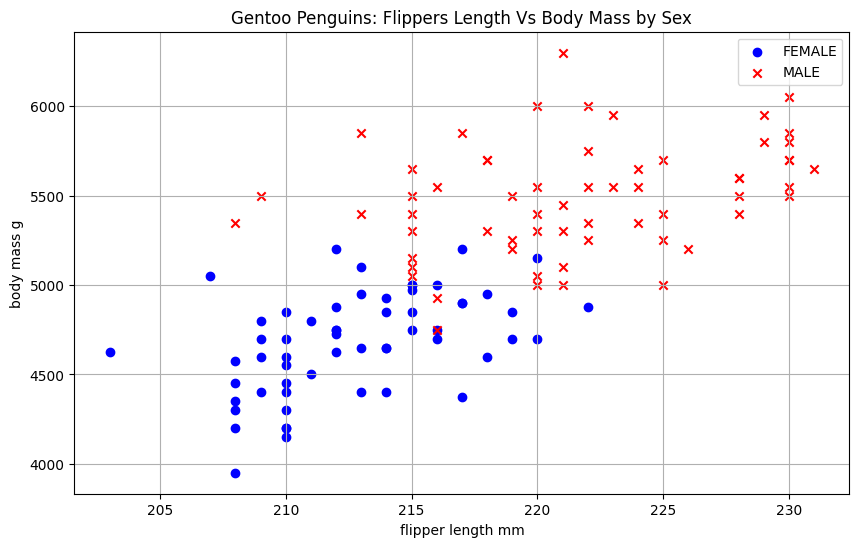

In [ ]:
temp = df.query('species == "Gentoo"')

plt.figure(figsize=(10,6))
marker_dict = {'MALE' : 'x', 'FEMALE' : 'o'}
c_dict = {'MALE' : 'red','FEMALE' : 'blue'}
for i,j in temp.groupby('sex'):
  plt.scatter(j['flipper_length_mm'],j['body_mass_g'],label=i,marker=marker_dict[i],c=c_dict[i])
plt.legend()
plt.grid(True)
plt.title('Gentoo Penguins: Flippers Length Vs Body Mass by Sex')
plt.xlabel('flipper length mm')
plt.ylabel('body mass g')

## QUESTION - 8

Make a 2-row, 1-column subplot figure:

Top subplot:

Histogram of bill_length_mm for all species combined.

Use bins=30.

Color: 'lightgreen', edge color 'black'.

Add a vertical red line showing the mean bill length.

Annotate that line with the text 'Mean' slightly above the line.

Bottom subplot:

Scatter plot of bill_length_mm vs flipper_length_mm for only Chinstrap penguins.

Points should be 'purple' and have alpha=0.6.

Add a horizontal line at flipper_length_mm = mean flipper length for Chinstrap.

Both:

Add titles, labels.

Use plt.style.use('seaborn-v0_8') for styling.

Make sure layout is tight and doesn’t overlap.

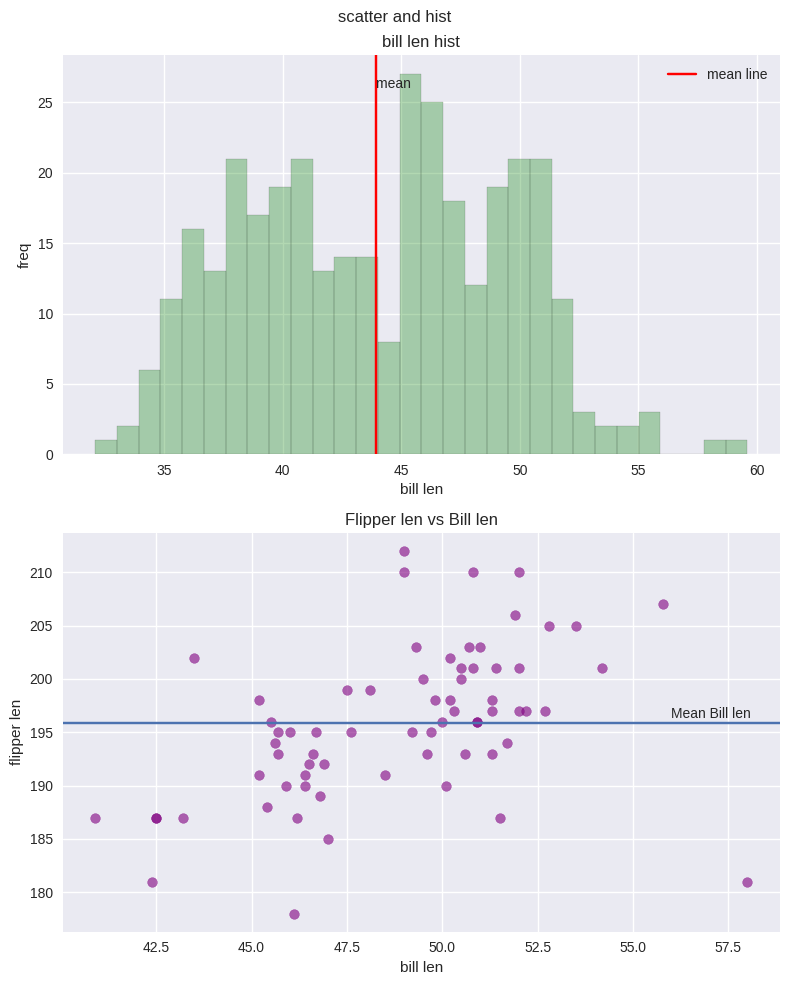

In [ ]:
plt.style.use('seaborn-v0_8')
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(8,10))

ax[0].hist(df['bill_length_mm'],bins=30,color='green',alpha=0.3,edgecolor='black')
ax[0].axvline(df['bill_length_mm'].mean(),color='red',label='mean line')
ax[0].text(df['bill_length_mm'].mean(),26,'mean')
ax[0].set_xlabel('bill len')
ax[0].set_ylabel('freq')
ax[0].legend()
ax[0].set_title('bill len hist')

temp = df.query('species == "Chinstrap"')
ax[1].scatter(temp['bill_length_mm'],temp['flipper_length_mm'],c='purple',alpha=0.6)
ax[1].axhline(temp['flipper_length_mm'].mean())
ax[1].text(temp['bill_length_mm'].max()-2,temp['flipper_length_mm'].mean()+0.5,'Mean Bill len')
ax[1].set_xlabel('bill len')
ax[1].set_ylabel('flipper len')
ax[1].set_title('Flipper len vs Bill len')


fig.suptitle('scatter and hist')
fig.tight_layout()


## QUESTION -9

Create a pie chart showing the percentage of each species in the dataset.

Requirements:

Show the percentage inside each slice with autopct.

Use explode to slightly pull out the largest species slice for emphasis.

Use a shadow for style.

Start the first slice at 90 degrees (startangle=90).

Add a title: 'Species Distribution of Penguins'.

Text(0.5, 1.0, 'Species Distribution of Penguins')

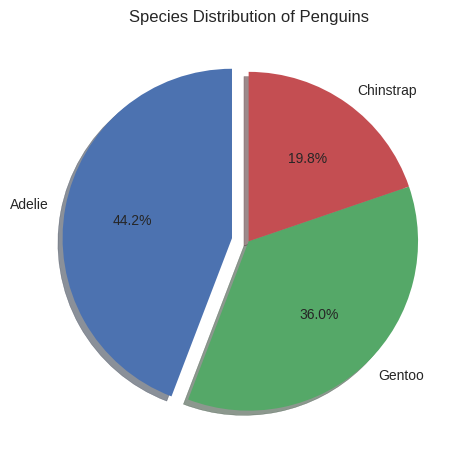

In [ ]:
temp = df['species'].value_counts()

plt.pie(temp,labels=temp.index,autopct='%0.01f%%',explode=[0.1,0,0],shadow=True,startangle=90)
plt.title('Species Distribution of Penguins')

## QUESTION - 10

Make a plot that shows how bill length and bill depth relate using a contour representation.

Your goal:

Use only Adelie penguins.

Plot the contour of density or smooth distribution for bill_length_mm vs bill_depth_mm.

Add appropriate labels and title.

Make it clear where the concentration of points is highest.

/tmp/ipython-input-145-352990078.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.dropna(inplace=True)


Text(0.5, 1.0, 'countourf plot')

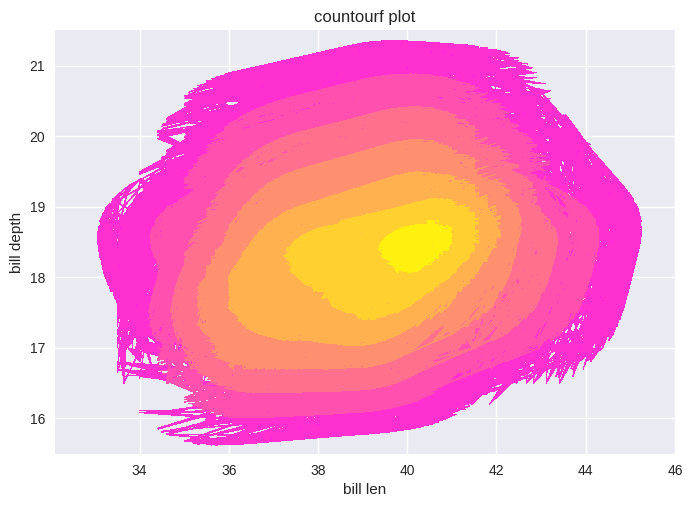

In [ ]:
from scipy.stats import gaussian_kde

temp = df.query('species == "Adelie"')
fig,ax = plt.subplots()
temp.dropna(inplace=True)
k = gaussian_kde([temp['bill_length_mm'], temp['bill_depth_mm']])

xx, yy = np.meshgrid(temp['bill_length_mm'],temp['bill_depth_mm'])
coords = np.vstack([xx.ravel(),yy.ravel()])
zz = k(coords).reshape(xx.shape)

ax.contourf(xx,yy,zz,cmap='spring')

ax.set_xlabel('bill len')
ax.set_ylabel('bill depth')
ax.set_title('countourf plot')

## Q11 — Heatmap
Dataset: Penguins

Create a heatmap showing the correlation matrix of all numerical columns.

Requirements:

Show values inside each cell (rounded).

Add a colorbar.

Title: 'Correlation Heatmap of Penguins Dataset'.

In [ ]:
temp.columns.to_list()

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

Text(0.5, 1.0, 'Corr heatmap')

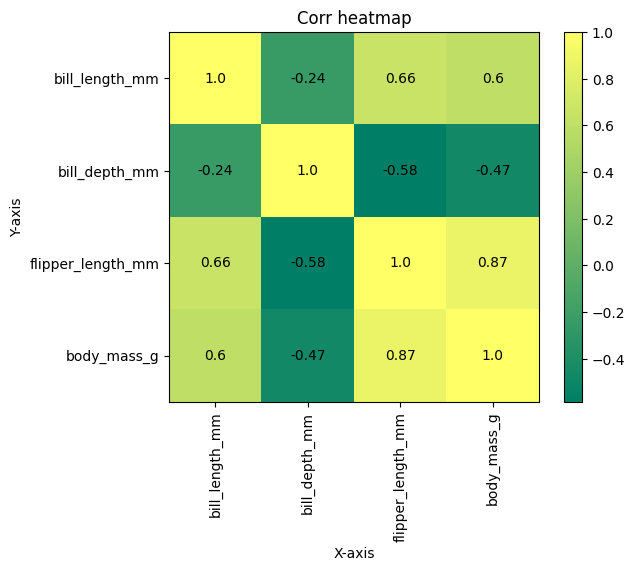

In [ ]:
temp = df.select_dtypes([int,float]).corr()
plt.imshow(temp,cmap='summer')
for i in range(len(temp.index)):
  for j in range(len(temp.columns)):
    plt.text(i,j,round(temp.iloc[i,j],2),ha='center',va='center')
plt.xticks(np.arange(len(temp.columns)),temp.columns.to_list(),rotation=90)
plt.yticks(np.arange(len(temp.columns)),temp.index.to_list())
plt.colorbar()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Corr heatmap')

## QUESTION-12

Show a grouped bar chart comparing the average body_mass_g of each species across sexes.

Goal:

X-axis: species

Each species: two bars side by side → one for Male, one for Female

Bars must be different colors for Male and Female

Add legend for sex

Title: 'Average Body Mass by Species and Sex'

Label axes

[]

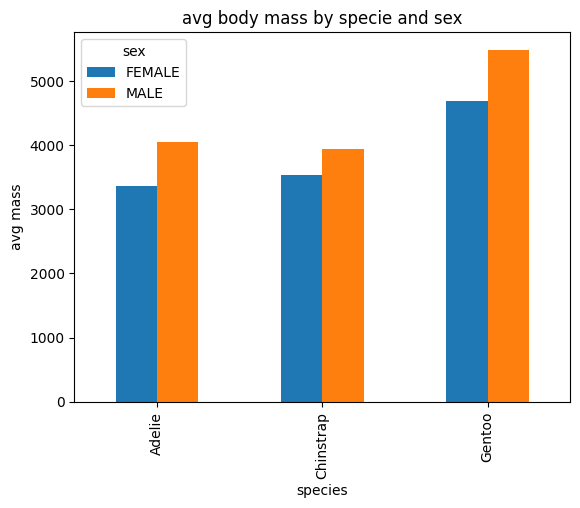

In [ ]:
temp = df.groupby(['species','sex'])['body_mass_g'].mean().round().unstack()
temp.plot(kind='bar',title='avg body mass by specie and sex')
plt.ylabel('avg mass')
plt.plot()

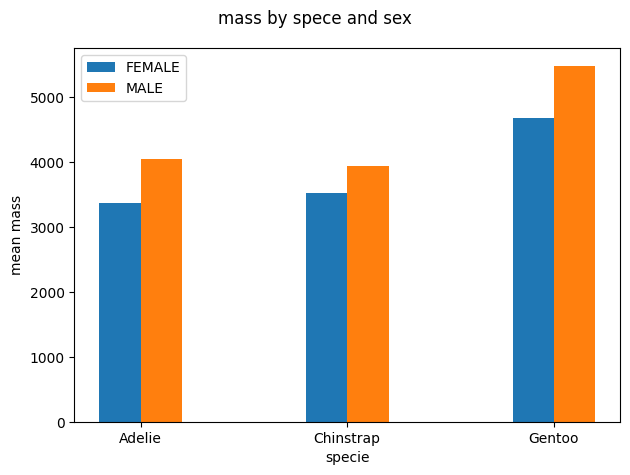

In [ ]:
fig,ax = plt.subplots()

idx = temp.index.to_list()
cols = temp.columns.to_list()

x = np.arange(len(idx))
width = 0.2

for i,j in enumerate(cols):
  ax.bar(
      x+width*i,
      temp[j],
      width = width,
      label=j
  )

ax.set_xticks(x+0.1,temp.index)
ax.set_xlabel('specie')
ax.set_ylabel('mean mass')
ax.legend()
fig.suptitle('mass by spece and sex')
fig.tight_layout()

## QUESTION 13

Show a stacked bar chart of the count of each species stacked by island.

Goal:

X-axis: species

Y-axis: total count of penguins

Bars: stacks for each island within the species

Different colors for each island

Add legend for islands

Add title: 'Penguin Count by Species and Island (Stacked)'

Label axes


<Axes: xlabel='species'>

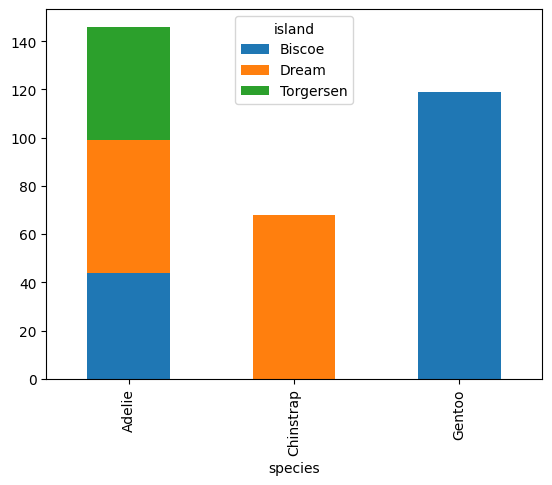

In [ ]:
temp = df.groupby(['island','species'])['sex'].count().unstack(0).fillna(0)
temp.plot(kind='bar',stacked=True)

Text(0.5, 1.0, 'penguin count by species and island')

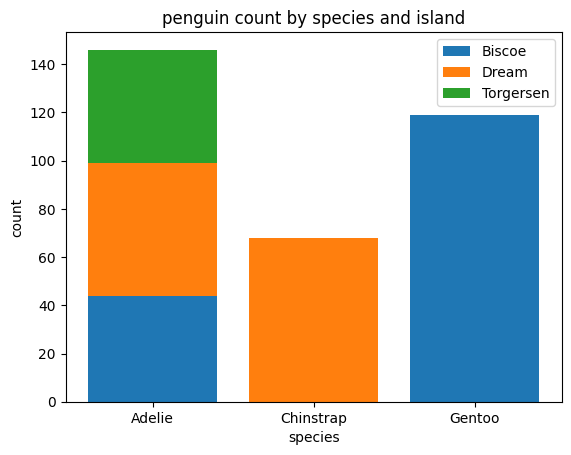

In [ ]:
btm = np.zeros(len(temp.index))
for i in range(len(temp.columns)):
  plt.bar(temp.index,temp.iloc[:,i],bottom=btm,label=temp.columns[i])
  btm = btm+temp.iloc[:,i]
plt.xlabel('species')
plt.ylabel('count')
plt.legend()
plt.title('penguin count by species and island')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
cars = pd.read_csv('/content/CLEANED_LUXUARY_LEXUS.csv')

In [ ]:
cars.drop(columns=['PARENT COMPANY','BRAND','MAKE ORIGIN','IMAGE'],inplace=True)

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3516 entries, 0 to 3515
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CAR NAME                 3516 non-null   object 
 1   MODEL/CLASS              3516 non-null   object 
 2   MODEL                    3516 non-null   int64  
 3   PRICE($)                 3516 non-null   float64
 4   STOCK TYPE               3516 non-null   object 
 5   PRICE RANGE              3515 non-null   object 
 6   MILEAGE                  3516 non-null   int64  
 7   AGE OF CAR               3516 non-null   int64  
 8   RATING                   3516 non-null   float64
 9   REVIEW                   3516 non-null   float64
 10  DEALER NAME              3515 non-null   object 
 11  DEALER LOCATION (CITY)   3516 non-null   object 
 12  DEALER LOCATION (STATE)  3515 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 357.2+ KB


## QUESTION 14

Visualize how the relationship between PRICE($) and MILEAGE varies across different STOCK TYPE categories and PRICE RANGE levels. Additionally, highlight how this relationship changes with the AGE OF CAR by using size or color. Use subplots to separate the plots by DEALER LOCATION (STATE) but only for the top 4 states with the highest number of cars.

Text(0.5, 0.98, 'SCATTER PLOT OF TOP 4 STATE')

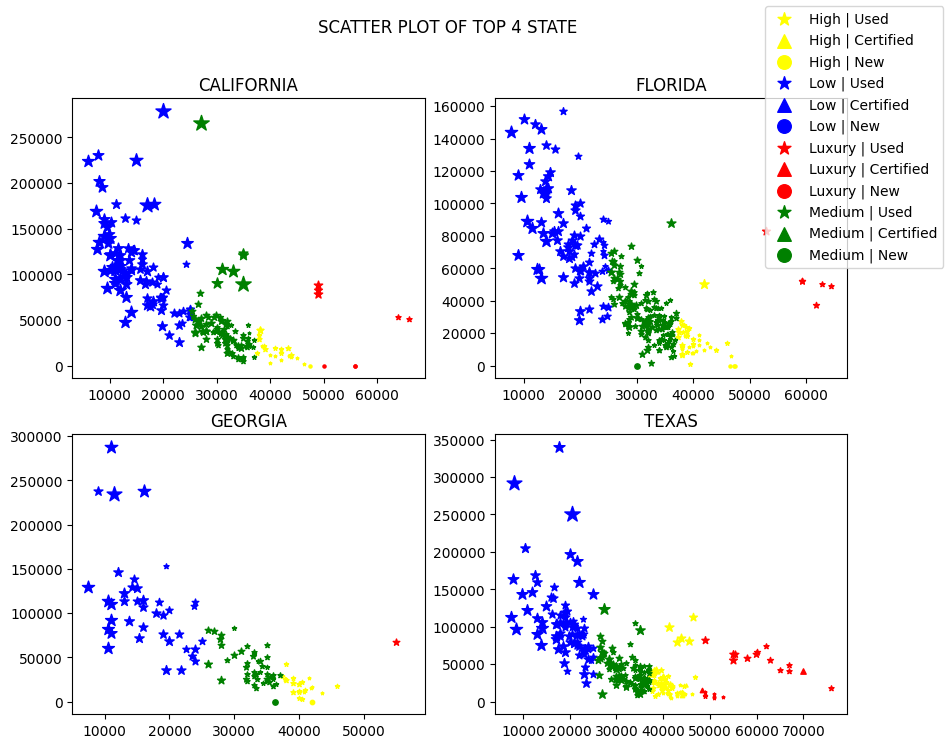

In [ ]:
temp = cars[cars['DEALER LOCATION (STATE)'].isin(cars['DEALER LOCATION (STATE)'].value_counts().head(4).index)]
c_dict = {'Luxury' : 'red','Medium':'green','High':'yellow','Low':'blue'}
marker_dict = {'Used' : '*','Certified' : '^','New' : 'o'}
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(10,8))
axes = [[0,0],[0,1],[1,0],[1,1]]
for i,j in enumerate(temp.groupby('DEALER LOCATION (STATE)')):
  name,df = j
  for p,q in df.groupby('PRICE RANGE'):
    for stock,marker in marker_dict.items():
      for size in temp['AGE OF CAR'].unique():
        data = q[(q['STOCK TYPE'] == stock) & (q['AGE OF CAR'] == size)]
        ax[axes[i][0]][axes[i][1]].scatter(x=data['PRICE($)'],y=data['MILEAGE'],c=c_dict[p],marker=marker,label=f'{p} | {stock}',s=size*5)
        ax[axes[i][0]][axes[i][1]].set_title(name.upper())

handles, labels = ax[0][0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.figure.legend(by_label.values(), by_label.keys())
fig.figure.suptitle('SCATTER PLOT OF TOP 4 STATE')

## Question 15:

Plot a custom histogram of MILEAGE for each STOCK TYPE, but instead of plt.hist, compute the histogram bin counts manually using numpy.histogram and draw them using ax.bar.

Create one subplot per STOCK TYPE (subplot grid).

Overlay a line plot showing the mean MILEAGE as a vertical line for each STOCK TYPE.

Add annotations to label the mean value on each subplot.

(array([1, 3, 6, 5, 1, 2, 0, 0, 0, 1]), array([28888., 32999., 37110., 41221., 45332., 49443., 53554., 57665.,
       61776., 65887., 69998.]))
(array([  1,   0,  12,   1,   5, 118, 489, 301, 158, 144]), array([29995., 32776., 35557., 38338., 41119., 43900., 46681., 49462.,
       52243., 55024., 57805.]))
(array([185, 321, 377, 546, 465, 247,  65,  25,  29,   8]), array([ 4000., 11290., 18580., 25870., 33160., 40450., 47740., 55030.,
       62320., 69610., 76900.]))


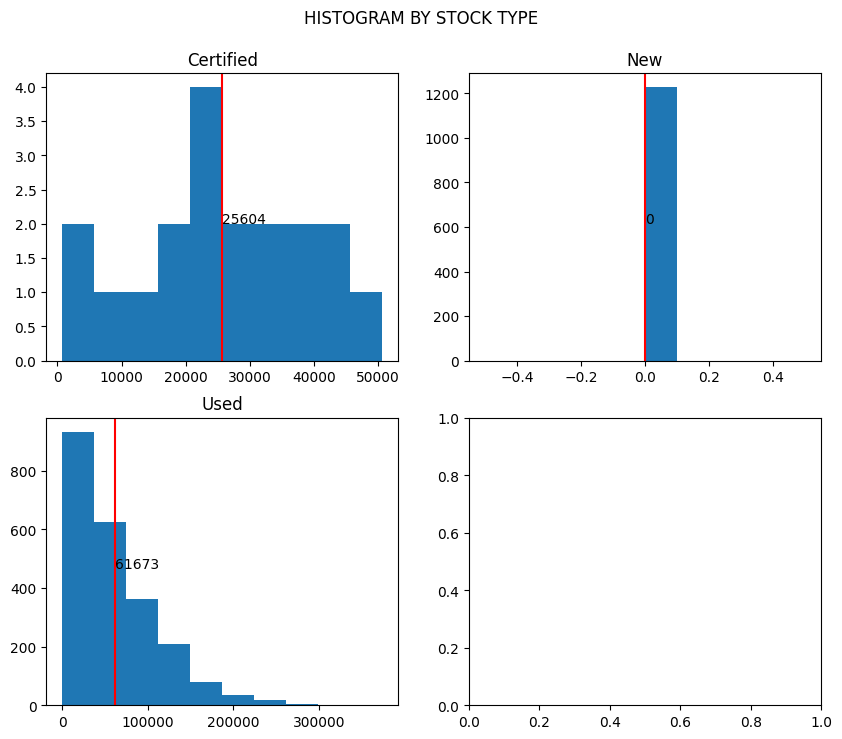

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(10,8))
axes = [[0,0],[0,1],[1,0],[1,1]]

for i,j in enumerate(cars.groupby('STOCK TYPE')):
  stock,df = j
  print(np.histogram(df['PRICE($)']))
  ax[axes[i][0]][axes[i][1]].hist(df['MILEAGE'],bins=np.histogram(df['MILEAGE'])[1])
  ax[axes[i][0]][axes[i][1]].set_title(stock)
  ax[axes[i][0]][axes[i][1]].axvline(df['MILEAGE'].mean(),color='red')
  ymean = np.histogram(df['MILEAGE'])[0].max()/2
  ax[axes[i][0]][axes[i][1]].text(df['MILEAGE'].mean(),ymean,round(df['MILEAGE'].mean()))
fig.figure.suptitle('HISTOGRAM BY STOCK TYPE')
fig.figure.subplots_adjust(top=0.9)